In [1]:
import pandas as pd

# Cargar el dataset (asegúrate de usar la ruta correcta al archivo)
df = pd.read_csv('/kaggle/input/video-game-sales-2024/vgchartz-2024.csv')

# Mostrar las primeras filas del DataFrame para entender su estructura
print(df.head())

# Verificar valores faltantes en cada columna
print(df.isnull().sum())

# Eliminar filas con valores faltantes en columnas críticas, asegurándonos de trabajar con una copia para evitar el warning
df_clean = df.dropna(subset=['critic_score', 'total_sales']).copy()

# Imputar valores faltantes en 'critic_score' con la media (usando .loc para evitar SettingWithCopyWarning)
media_critic_score = df_clean['critic_score'].mean()
df_clean.loc[:, 'critic_score'] = df_clean['critic_score'].fillna(media_critic_score)

# Eliminar las columnas 'img', 'na_sales', y 'jp_sales' que no se van a tener en cuenta
df_clean = df_clean.drop(columns=['img', 'na_sales', 'jp_sales'])

# Filtrar columnas irrelevantes (ajusta los nombres de las columnas según tu dataset)
columnas_relevantes = ['title', 'console', 'genre', 'publisher', 'developer', 'critic_score', 'total_sales']
df_clean = df_clean[columnas_relevantes]

# Crear categorías consolidadas si es necesario
# Por ejemplo, agrupar consolas similares
df_clean.loc[:, 'console'] = df_clean['console'].replace({'PS3': 'PlayStation', 'PS4': 'PlayStation'})

# Manejar datos atípicos en columnas de ventas
limite_superior = df_clean['total_sales'].quantile(0.99)  # el 99% de los datos
limite_inferior = df_clean['total_sales'].quantile(0.01)  # el 1% de los datos
df_clean = df_clean[(df_clean['total_sales'] >= limite_inferior) & (df_clean['total_sales'] <= limite_superior)]

# Finalmente, revisa los datos limpios
print(df_clean.describe())


                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal

He decidido dejar de tener en cuenta columnas como la imagen, venta en norte america y japon porque no son relevantes.

In [2]:
pip install matplotlib seaborn plotly


Note: you may need to restart the kernel to use updated packages.


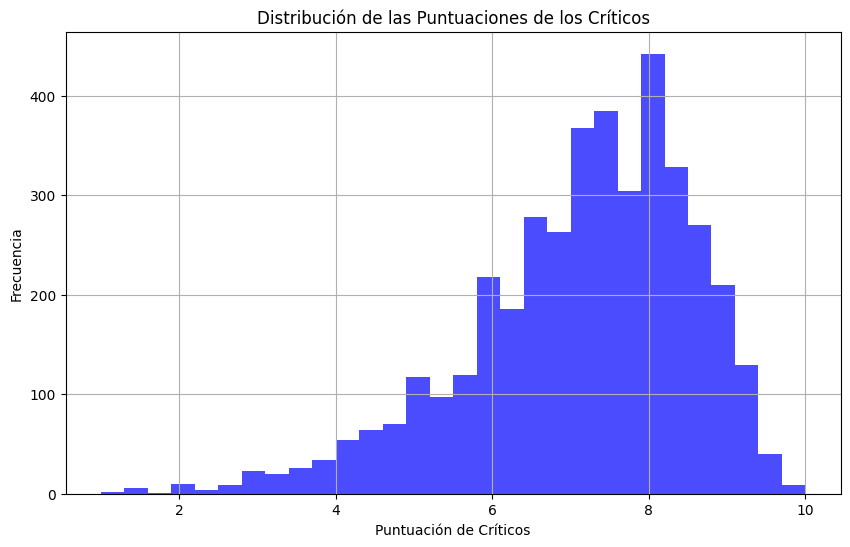

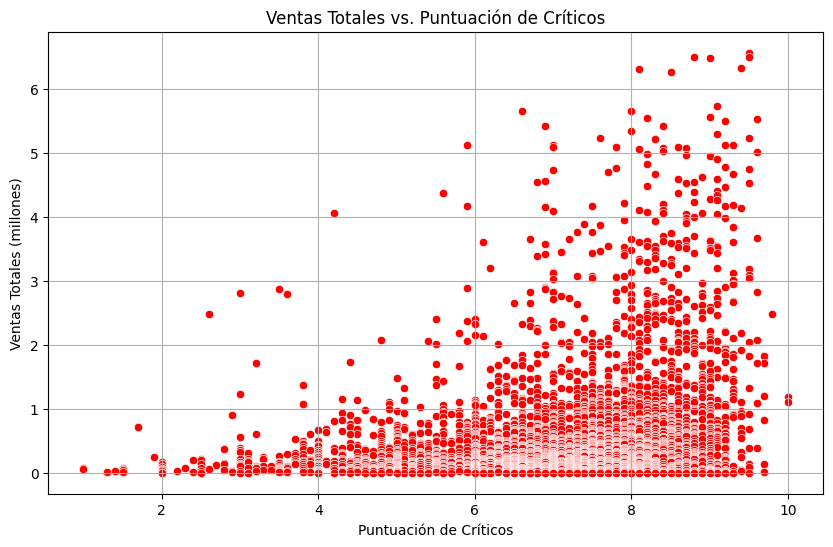

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


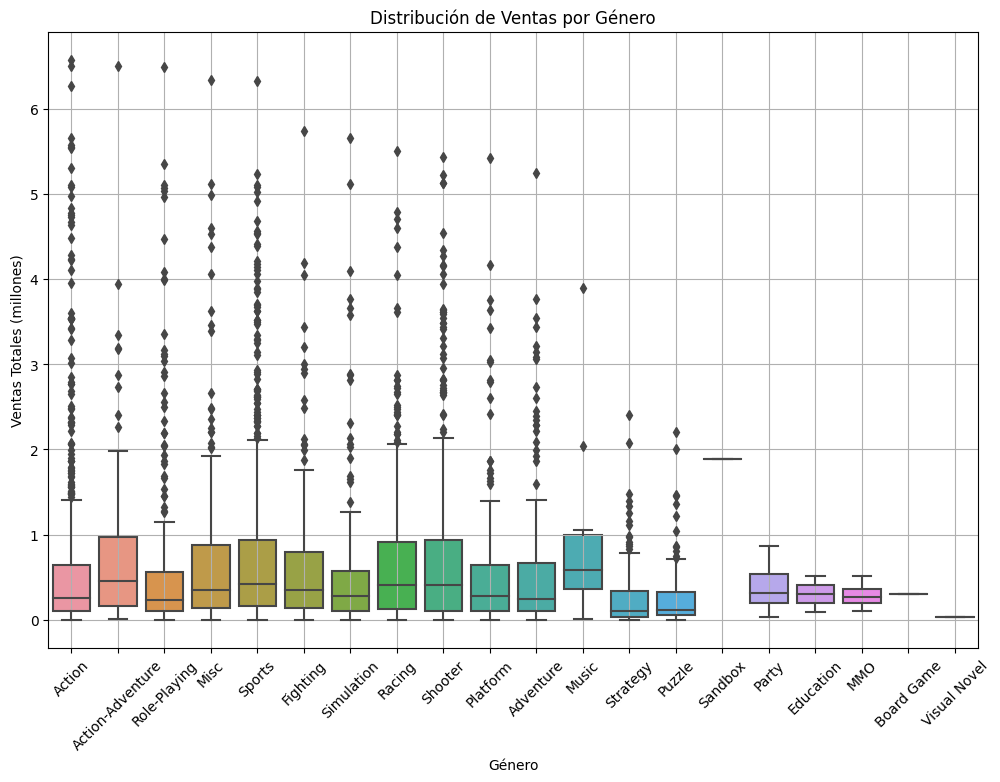

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar el dataset (asegúrate de usar la ruta correcta al archivo)
df = df_clean

# Asegúrate de limpiar y preparar los datos como discutimos en los mensajes anteriores

# Histograma de las puntuaciones de los críticos usando Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['critic_score'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución de las Puntuaciones de los Críticos')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Diagrama de dispersión de las ventas totales vs. puntuaciones de críticos usando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df, color='red')
plt.title('Ventas Totales vs. Puntuación de Críticos')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

# Visualización interactiva de las ventas por consola usando Plotly
fig = px.bar(df, x='console', y='total_sales', color='console', title='Ventas Totales por Consola')
fig.show()

# Caja de bigotes para comparar las ventas por género usando Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='total_sales', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

In [4]:
import pandas as pd

# Cargar el dataset (asegúrate de usar la ruta correcta al archivo)
df = pd.read_csv('/kaggle/input/video-game-sales-2024/vgchartz-2024.csv')

# Imprimir los nombres de las columnas para verificar la existencia de 'release_date' o una columna similar
print(df.columns)


Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')


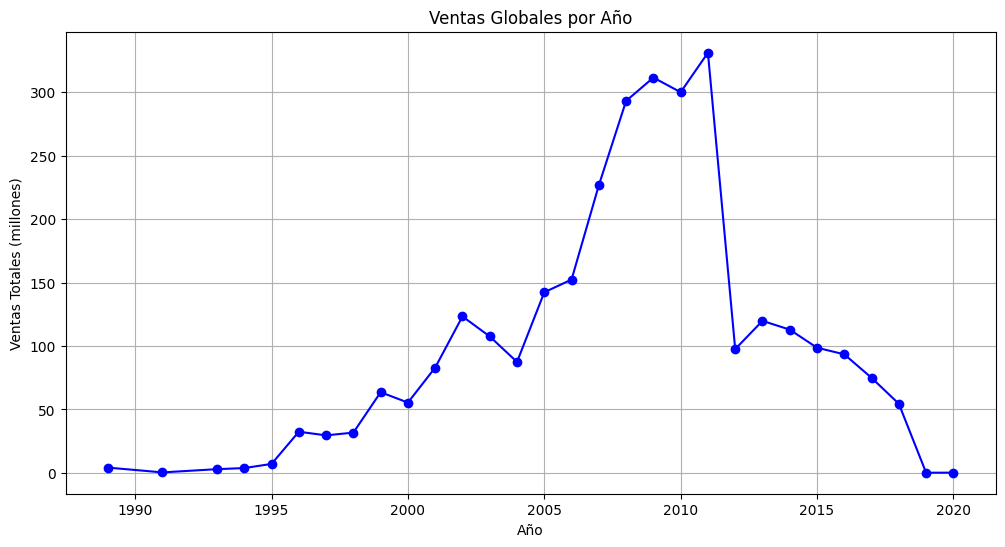

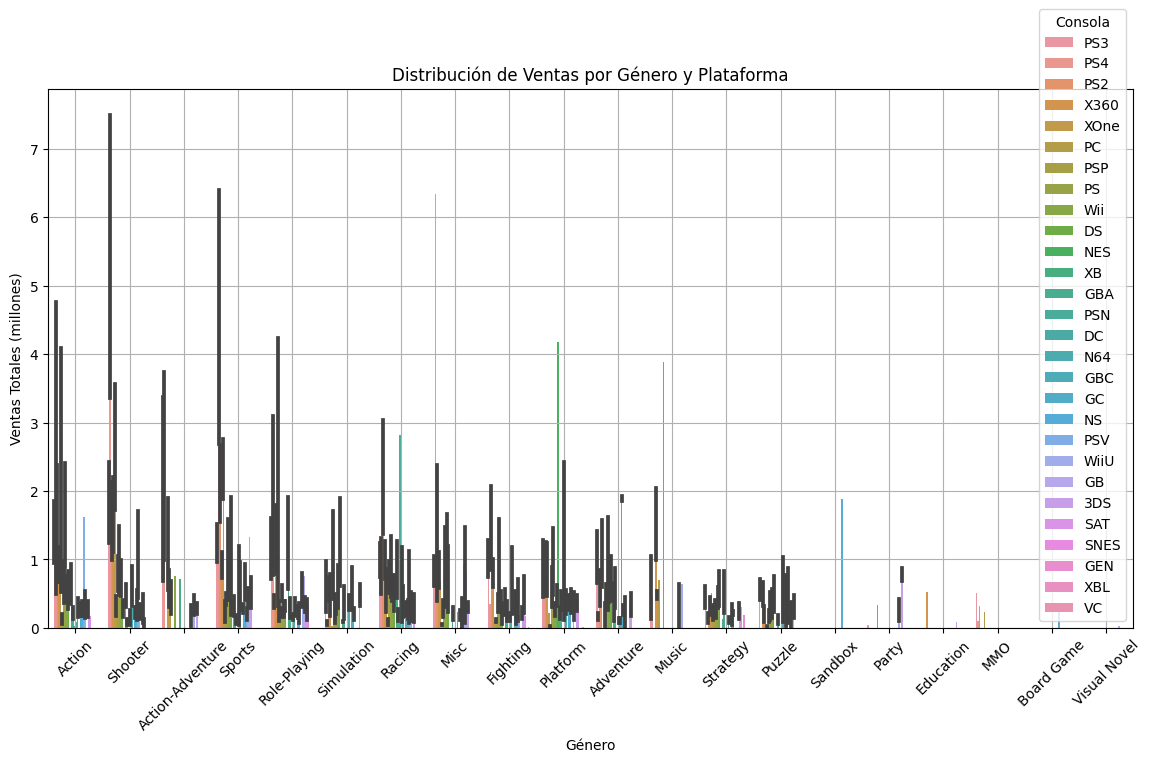

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [5]:
# Convertir 'release_date' a formato de fecha y extraer el año
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Limpieza de datos: eliminar filas donde 'year' o 'total_sales' sean NaN
df = df.dropna(subset=['year', 'total_sales', 'critic_score'])

# Visualización de las ventas globales por año usando Matplotlib
plt.figure(figsize=(12, 6))
df.groupby('year')['total_sales'].sum().plot(kind='line', marker='o', color='b')
plt.title('Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

# Distribución de ventas por género y plataforma usando Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x='genre', y='total_sales', hue='console', data=df)
plt.title('Distribución de Ventas por Género y Plataforma')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Consola')
plt.grid(True)
plt.show()

# Efecto de las calificaciones en las ventas usando un gráfico de dispersión interactivo con Plotly
fig = px.scatter(df, x='critic_score', y='total_sales', color='genre', trendline='ols',
                 labels={'total_sales': 'Ventas Totales (millones)', 'critic_score': 'Puntuación de Críticos'},
                 title='Efecto de las Calificaciones en las Ventas')
fig.show()